In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#GENERATING INPUTS AND OUTPUTS AND SAVING IN .npz FORMAT

observations=1000
xs=np.random.uniform(-10,10,(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
generated_input = np.column_stack((xs,zs))
noise=np.random.uniform(-1,1,(observations,1))
generated_targets=2*xs-3*zs+5+noise
np.savez('TF_INTRO',inputs=generated_input,targets=generated_targets)


print(generated_input.shape,generated_targets.shape)

(1000, 2) (1000, 1)


In [3]:
# CREATING PLACEHOLDERS FOR INPUTS AND OUTPUTS AND INITIALIZING WEIGHTS AND BIASES

input_columns=2
output_columns=1

inputs = tf.placeholder(tf.float32,[None,input_columns])
targets = tf.placeholder(tf.float32,[None,output_columns])

weights=tf.Variable(tf.random_uniform([input_columns,output_columns],minval=-0.1,maxval=0.1))
biases=tf.Variable(tf.random_uniform([output_columns],minval=-0.1,maxval=0.1))

outputs=tf.matmul(inputs,weights)+biases


In [4]:
#CREATING MEAN LOSS FUNCTION TO TRACK PERFORMANCE OF OUR ALGO
#CREATING GRADIENT DESCENT OPTIMIZER AND MINIMIZING THE MEAN LOSS FUNCTION 

mean_loss = tf.losses.mean_squared_error(labels=targets,predictions=outputs)/2.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

W1113 19:04:07.216090 10760 deprecation.py:323] From C:\Users\sharma ji\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
sess=tf.InteractiveSession()

In [6]:
#INITIALIZING ALL THE VARIABLES ( IN THIS CASE ONLY WEIGHTS AND BIASES )

variables_initializer = tf.global_variables_initializer()
sess.run(variables_initializer)

In [7]:
data=np.load('TF_INTRO.npz')
for e in range (100):
    _,loss = sess.run([optimizer,mean_loss],
                     feed_dict={inputs:data['inputs'] , targets:data['targets']})
    print(loss)

240.51837
158.45078
107.175644
74.11489
52.24564
37.481335
27.349043
20.29984
15.335643
11.798964
9.249243
7.3876796
6.0096574
4.974096
4.1831274
3.5685182
3.0824609
2.691272
2.3710837
2.104855
1.8803277
1.6885893
1.5230883
1.3789419
1.2524616
1.1408105
1.0417725
0.9535829
0.8748155
0.8042956
0.74104273
0.68422586
0.6331328
0.5871478
0.5457315
0.5084119
0.4747697
0.4444333
0.41707152
0.3923888
0.37011907
0.35002452
0.33189067
0.3155262
0.3007571
0.28742763
0.27539673
0.26453802
0.25473738
0.2458906
0.2379057
0.23069832
0.22419271
0.21832071
0.21302046
0.20823623
0.20391765
0.20001972
0.19650121
0.1933251
0.19045834
0.1878707
0.18553492
0.1834266
0.18152352
0.17980582
0.17825526
0.17685576
0.17559244
0.17445202
0.17342271
0.17249359
0.17165497
0.17089799
0.1702147
0.16959791
0.1690412
0.16853864
0.16808501
0.1676756
0.167306
0.16697241
0.16667126
0.16639948
0.16615418
0.16593271
0.16573282
0.16555235
0.1653895
0.16524251
0.16510975
0.16499
0.16488187
0.1647843
0.16469619
0.1646167
0.164

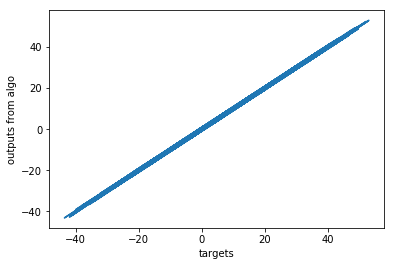

In [8]:
out=sess.run([outputs],feed_dict={inputs:data['inputs']})
plt.plot(data['targets'],np.squeeze(out))
plt.xlabel('targets')
plt.ylabel('outputs from algo')
plt.show()

In [9]:
sess.run(weights)


array([[ 2.001999 ],
       [-3.0008721]], dtype=float32)

In [10]:
sess.run(biases)

array([4.961202], dtype=float32)